In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/Users/jrpowers-luhn/miniconda3/envs/579/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jrpowers-luhn/miniconda3/envs/579/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Load the data

In [3]:
datafile = 'data/ionosphere.data'
colnames = [i for i in range(34)]
colnames.append('class')
df = pd.read_csv(datafile, names=colnames)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


## One-hot encode the class data

In [5]:
df = pd.get_dummies(df)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,class_b,class_g
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0,1


## Split into `train` and `test`

In [26]:
train, test = train_test_split(df, )
train.shape

(263, 36)

In [8]:
xcols = df.columns[:-1]
ycol = df.columns[-1]

# Support Vector Classifier

In [9]:
svc = Pipeline([
    ('scale', StandardScaler()),
    ('svc', SVC())
])

In [10]:
parameters = {
    'svc__C': np.logspace(-3, 3),
    'svc__gamma': np.logspace(-2, 1)
}

In [11]:
gs = GridSearchCV(estimator=svc, param_grid=parameters,)

In [12]:
gs.fit(train[xcols], train['class_b'])

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svc__C': array([1.00000e-03, 1.32571e-03, 1.75751e-03, 2.32995e-03, 3.08884e-03,
       4.09492e-03, 5.42868e-03, 7.19686e-03, 9.54095e-03, 1.26486e-02,
       1.67683e-02, 2.22300e-02, 2.94705e-02, 3.90694e-02, 5.17947e-02,
       6.86649e-02, 9.10298e-02, 1.20679e-01, 1.59986e-01, 2.1...746,
        3.72759,  4.29193,  4.94171,  5.68987,  6.55129,  7.54312,
        8.68511, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
gs.best_params_

{'svc__C': 0.49417133613238334, 'svc__gamma': 0.015264179671752334}

In [14]:
np.argwhere(gs.predict(train[xcols]) == train['class_b']).shape

(263, 1)

263 correct identifications

In [15]:
train_predict = gs.predict(train[xcols])

Text(0.5, 1.0, 'Training set')

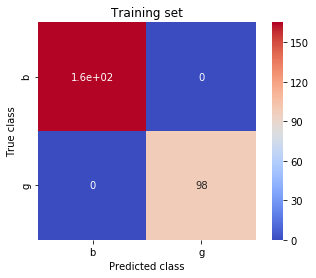

In [16]:
c = sns.heatmap(confusion_matrix(train['class_b'], train_predict), annot=True, square=True, cmap='coolwarm')
c.set(xticklabels=['b', 'g'])
c.set(yticklabels=['b', 'g'])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Training set')

Text(0.5, 1.0, 'Testing set')

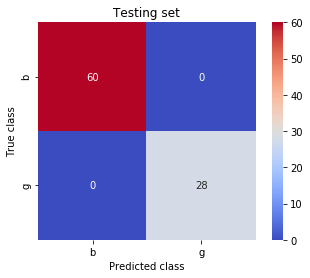

In [17]:
c = sns.heatmap(confusion_matrix(test['class_b'], gs.predict(test[xcols])), annot=True, square=True, cmap='coolwarm')
c.set(xticklabels=['b', 'g'])
c.set(yticklabels=['b', 'g'])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Testing set')

# Support vectors

In [24]:
gs.best_estimator_.named_steps.svc.support_vectors_.shape

(103, 35)

In [25]:
gs.best_estimator_.named_steps.svc.n_support_

array([45, 58], dtype=int32)

# Data dimensionality

In [18]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA().fit(train[xcols])

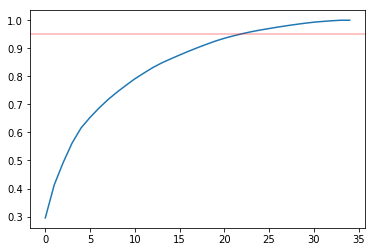

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, alpha=0.3, color='r')